# Clustering of DIME embeddings of WSI patches

### By Elsa Jonsson, Embeddings provided by AstraZeneca

In this notebook i will take DIME embeddings of tumour patches of the Camelyon16 dataset and create a binary classifier using a Logistic Regression network

### If not working in my docker container, run this line first:

In [ ]:
! pip install -r ../requirements.txt

### If you are working in the docker container from the resp. start here:

In [2]:
from utils import *

## Load & inspect data

In [3]:
# SIMCLR aggressive 
folder_simclr_aggressive_train = 'Camelyon16/simclr/aggressive/no_cutout/train_test/ShuffledTest00_50_ShuffledPartitions3_0/plots/epoch_-1_train_fullSize'
folder_simclr_aggressive_test = 'Camelyon16/simclr/aggressive/no_cutout/test_tumor/ShuffledTest00_50_ShuffledPartitions3_0/plots/epoch_-1_train_fullSize'

In [5]:
embeddings_simclr_aggressive_train, classes_simclr_aggressive_train, patch_information_simclr_aggressive_train = load_data(folder_simclr_aggressive_train)
embeddings_simclr_aggressive_train, embeddings_simclr_aggressive_test, classes_simclr_aggressive_train, classes_simclr_aggressive_test, patch_information_simclr_aggressive_train, patch_information_simclr_aggressive_test = sort_train_test(embeddings_simclr_aggressive_train, classes_simclr_aggressive_train, patch_information_simclr_aggressive_train)

In [6]:
print_data(9999, embeddings_simclr_aggressive_train, classes_simclr_aggressive_train, patch_information_simclr_aggressive_train)

---------------- EMBEDDING -----------------------
[6.79389462e-02 0.00000000e+00 0.00000000e+00 5.14211729e-02
 8.11610520e-02 1.26336552e-02 3.22699314e-04 7.78274387e-02
 1.67384725e-02 6.47986531e-02 0.00000000e+00 4.12523113e-02
 9.33871567e-02 1.55220705e-03 4.32720128e-03 1.24498375e-01
 2.70823147e-02 0.00000000e+00 5.56642748e-02 5.75876683e-02
 1.66901015e-02 9.37808398e-03 6.40949458e-02 1.34598222e-02
 5.19537777e-02 2.91205067e-02 1.03207298e-01 2.61678640e-03
 4.67165746e-02 4.50507998e-02 3.51746008e-02 6.77367253e-03
 1.51127941e-04 1.79860916e-03 4.78457287e-03 2.12559234e-02
 3.68086211e-02 7.37728253e-02 2.17276104e-02 3.98780704e-02
 4.67416568e-04 0.00000000e+00 1.01320529e-02 3.36326696e-02
 3.90552916e-02 9.77319106e-03 5.08180959e-03 1.60758998e-02
 1.56910112e-03 1.30693393e-03 0.00000000e+00 2.07224977e-03
 2.04063207e-02 2.86453441e-02 3.38294953e-02 6.93785632e-03
 3.13330106e-02 0.00000000e+00 4.93040271e-02 5.63105270e-02
 1.16649875e-02 4.52186838e-02 1.6

In [7]:
print("-----------NUM simclr_aggressive EMBEDDINGS TRAIN-------------")
print(len(embeddings_simclr_aggressive_train))
print("-----------NUM simclr_aggressive EMBEDDINGS TEST-------------")
print(len(embeddings_simclr_aggressive_test))
print("------------------------")

-----------NUM simclr_aggressive EMBEDDINGS TRAIN-------------
1353990
-----------NUM simclr_aggressive EMBEDDINGS TEST-------------
701967
------------------------


## Logistic Regression

### Hyperparameter optimization

In [9]:
X, y = percentage_dataset(embeddings_simclr_aggressive_train, classes_simclr_aggressive_train, 0.1)
C, penalty, solver = runLRHypPar(X,y)

/home/kzmq426/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kzmq426/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Best: 0.959554 using {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.959554 (0.005009) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.959405 (0.005080) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.959550 (0.005009) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.959554 (0.005010) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.959554 (0.005009) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.958239 (0.004980) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.958245 (0.004977) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.958223 (0.004975) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.958237 (0.004980) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.958239 (0.004980) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.949420 (0.005582) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.949420 (0.005582) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.949293 (0.005583) with: {'C': 1.0, 'penalty': '

### Percentage tests

---------------------------------------
PERCENTAGE: 10.0% OF DATASET, NUMBER EMBEDDINGS: 135399
HYPERPARAMETERS: C = 100, SOLVER = sag, PENALTY = l2
RUNTIME IN SEC: 65.90755581855774
ACCURACY:
0.9640524412116239
AUC & ROC CURVE:


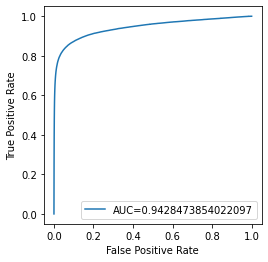

PRECISION RECALL CURVE:


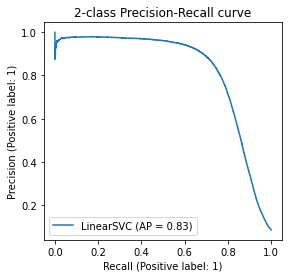

CONFUSION MATRIX:


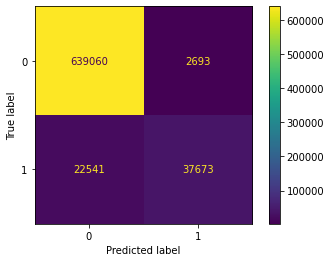

---------------------------------------
---------------------------------------
PERCENTAGE: 30.0% OF DATASET, NUMBER EMBEDDINGS: 406197
HYPERPARAMETERS: C = 100, SOLVER = sag, PENALTY = l2
RUNTIME IN SEC: 97.30195236206055
ACCURACY:
0.9635766353688991
AUC & ROC CURVE:


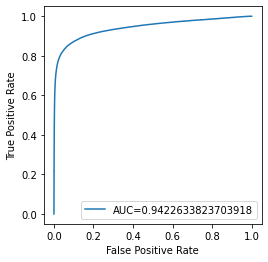

PRECISION RECALL CURVE:


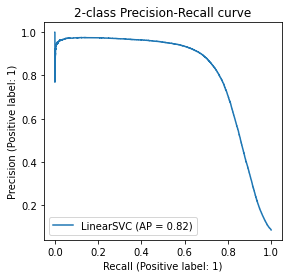

CONFUSION MATRIX:


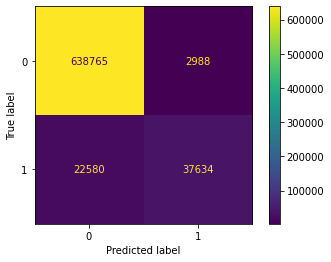

---------------------------------------
---------------------------------------
PERCENTAGE: 50.0% OF DATASET, NUMBER EMBEDDINGS: 676995
HYPERPARAMETERS: C = 100, SOLVER = sag, PENALTY = l2
RUNTIME IN SEC: 113.71150732040405
ACCURACY:
0.9636464392200773
AUC & ROC CURVE:


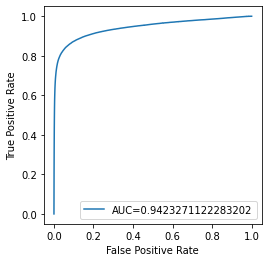

PRECISION RECALL CURVE:


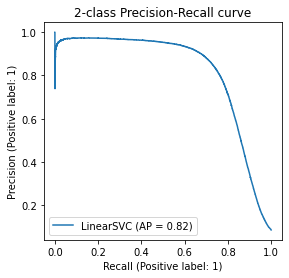

CONFUSION MATRIX:


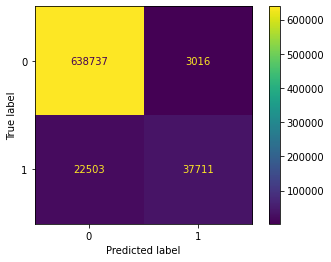

---------------------------------------
---------------------------------------
PERCENTAGE: 70.0% OF DATASET, NUMBER EMBEDDINGS: 947793
HYPERPARAMETERS: C = 100, SOLVER = sag, PENALTY = l2
RUNTIME IN SEC: 110.76482510566711
ACCURACY:
0.963721941344821
AUC & ROC CURVE:


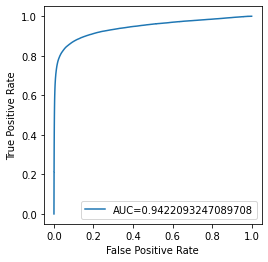

PRECISION RECALL CURVE:


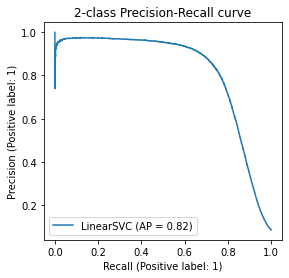

CONFUSION MATRIX:


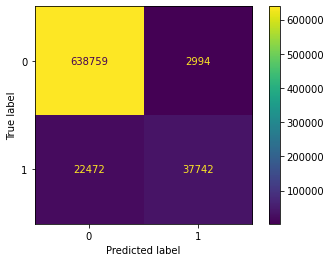

---------------------------------------
---------------------------------------
PERCENTAGE: 100% OF DATASET, NUMBER EMBEDDINGS: 1353990
HYPERPARAMETERS: C = 100, SOLVER = sag, PENALTY = l2
RUNTIME IN SEC: 196.56229066848755
ACCURACY:
0.9635894564844216
AUC & ROC CURVE:


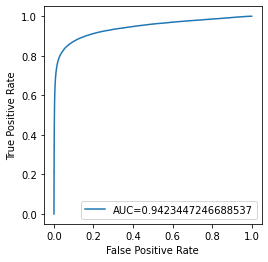

PRECISION RECALL CURVE:


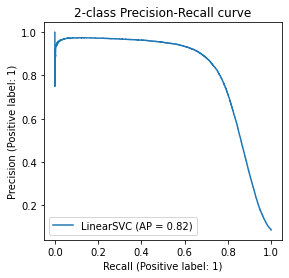

CONFUSION MATRIX:


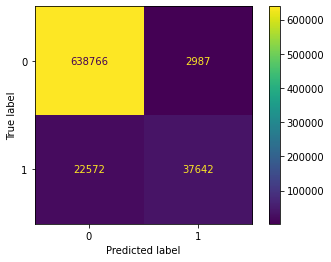

---------------------------------------


In [10]:
runLRPercentage(embeddings_simclr_aggressive_train, classes_simclr_aggressive_train, embeddings_simclr_aggressive_test, classes_simclr_aggressive_test, [0.1, 0.3, 0.5, 0.7, 1], solver, penalty, C)